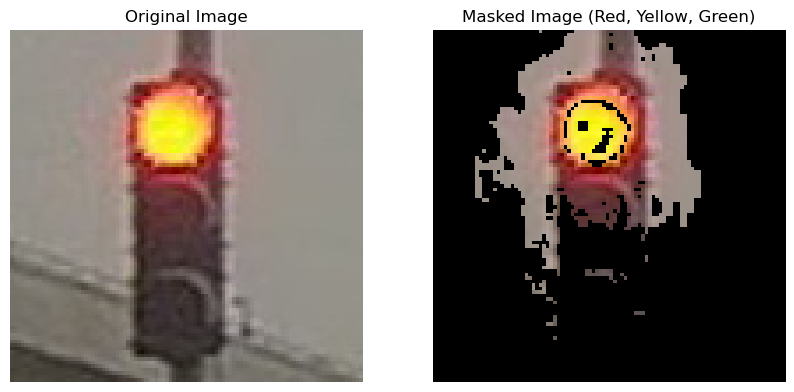

In [24]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
image = cv.imread('tlights/100_25.jpg')

# 转换为HSV颜色空间
img_hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# 定义红色、黄色、绿色的HSV范围
lower_red1 = np.array([0, 30, 90])
upper_red1 = np.array([15, 255, 255])
lower_red2 = np.array([160, 30, 90])
upper_red2 = np.array([180, 255, 255])

lower_yellow = np.array([20, 100, 150])
upper_yellow = np.array([30, 255, 255])

lower_green = np.array([75, 50, 100])
upper_green = np.array([95, 255, 255])

# 创建颜色掩码
mask_red1 = cv.inRange(img_hsv, lower_red1, upper_red1)
mask_red2 = cv.inRange(img_hsv, lower_red2, upper_red2)
mask_red = cv.bitwise_or(mask_red1, mask_red2)

mask_yellow = cv.inRange(img_hsv, lower_yellow, upper_yellow)
mask_green = cv.inRange(img_hsv, lower_green, upper_green)

# 合并所有颜色掩码
mask_combined = cv.bitwise_or(mask_red, mask_yellow)
mask_combined = cv.bitwise_or(mask_combined, mask_green)

# 对原始图像应用掩码，生成只显示符合颜色范围的图像
result_image = cv.bitwise_and(image, image, mask=mask_combined)

# 将原图和应用掩码的图像转换为 RGB 以便用 matplotlib 显示
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
result_image_rgb = cv.cvtColor(result_image, cv.COLOR_BGR2RGB)

# 在Jupyter中显示原始图像和掩码后的图像
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result_image_rgb)
plt.title("Masked Image (Red, Yellow, Green)")
plt.axis('off')

plt.show()
